In [1]:
import json
import os
import re

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ALL_MODELS_FOLDER = "../models/"
ALL_FIGURES_FOLDER = "../figures/"

In [3]:
bpc_losses = {}
nll_losses = {}

for subdir, _, files in os.walk(ALL_MODELS_FOLDER):
    if "trainer_state.json" in files:
        file_path = os.path.join(subdir, "trainer_state.json")
        with open(file_path, "r") as f:
            data = json.load(f)
            bpc_list = []
            nll_loss_list = []
            for log_entry in data.get("log_history", []):
                if "eval_bpc" in log_entry:
                    bpc_list.append(log_entry["eval_bpc"])
                    nll_loss_list.append(log_entry["eval_loss"])

            match = re.search(r"models[\\/](.*?)(\\|/|$)", subdir)
            if match:
                model_name = match.group(1)
                if bpc_list:
                    bpc_losses[model_name] = bpc_list
                    nll_losses[model_name] = nll_loss_list

In [4]:
def plot_losses(ax, model_losses, color_list, y_limits, xaxis_name):
    """
    Plots loss curves for a specific language.
    """
    color_idx = 0  #

    for model_name, bpc_list in model_losses.items():
        lan = re.search(r"(tr|es)", model_name).group(0)
        vs = re.search(r"\d+", model_name).group(0)
        vs_level = re.search(r"vs(\d+)", model_name).group(1)
        
        steps = np.arange(1, len(bpc_list) + 1) * 5
        ax.plot(
            steps, 
            bpc_list, 
            label=f"{lan}_{int(vs) // 1000}k", 
            color=color_list[color_idx % len(color_list)]
        )
        color_idx += 1  # Cycle through the gradient colors
    
    ax.set_xlabel("Training Steps")
    ax.set_ylabel(xaxis_name)
    ax.set_ylim(y_limits)
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True, linestyle='-', color='gray', linewidth=0.5, alpha=0.25)

In [88]:
def plot_and_save_losses(losses, save_name, colors, y_limits, yaxis_name):
    """
    Plots and saves BPC loss curves for ES and TR models.
    
    Parameters:
    - bpc_losses (dict): A dictionary of BPC losses with model names as keys.
    - save_name (str): The file name (including path) to save the plot.
    - colors (dict): A dictionary of colors for ES and TR models (e.g., {'es': 'green', 'tr': 'blue'}).
    """

    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 5))

    es_losses = {k: v for k, v in losses.items() if 'es' in k}
    tr_losses = {k: v for k, v in losses.items() if 'tr' in k}
    
        
    plot_losses(ax1, es_losses, colors["es"], y_limits, yaxis_name)
    plot_losses(ax2, tr_losses, colors["tr"], y_limits, yaxis_name)

    
    plt.tight_layout()
    plt.savefig(ALL_FIGURES_FOLDER+save_name, format='svg')
    plt.show()

In [89]:
all_bpcs = [value for sublist in {k: v for k, v in bpc_losses.items()}.values() for value in sublist]
all_nll = [value for sublist in {k: v for k, v in nll_losses.items()}.values() for value in sublist]

y_limits_bpc = (min(all_bpcs), max(all_bpcs)+0.1)
y_limits_nll = (min(all_nll)-0.2, max(all_nll)+0.2)

In [90]:
bpe_bpc = {k: v for k, v in bpc_losses.items() if "BPE" in k}
wordpiece_bpc = {k: v for k, v in bpc_losses.items() if "Wordpiece" in k}
unigram_bpc  = {k: v for k, v in bpc_losses.items() if "Unigram" in k}

bpe_nll = {k: v for k, v in nll_losses.items() if "BPE" in k}
wordpiece_nll= {k: v for k, v in nll_losses.items() if "Wordpiece" in k}
unigram_nll  = {k: v for k, v in nll_losses.items() if "Unigram" in k}

In [91]:
colors = {
    "es": ["#4E9A84", "#438D77", "#367D6A", "#295E57"],  
    "tr": ["#68B3C7", "#4DA1B4", "#3B7D98", "#2C5B73"]   
}

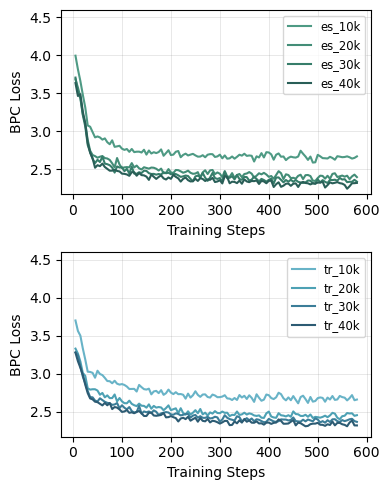

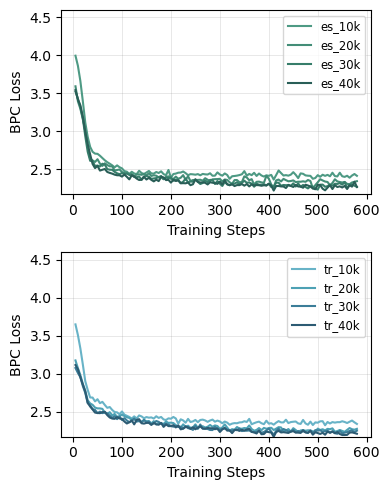

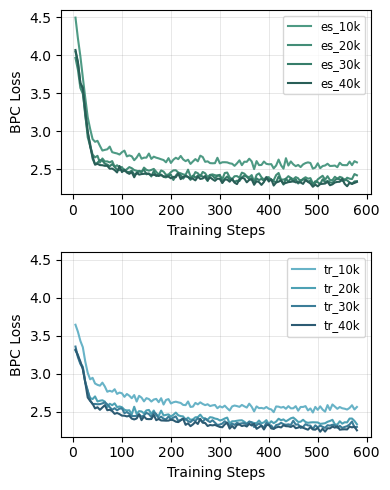

In [92]:
plot_and_save_losses(bpe_bpc, "bpe_bpc.svg", colors, y_limits_bpc, 'BPC Loss')
plot_and_save_losses(wordpiece_bpc, "wordpiece_bpc.svg", colors, y_limits_bpc, 'BPC Loss')
plot_and_save_losses(unigram_bpc, "unigram_bpc.svg", colors, y_limits_bpc, 'BPC Loss')

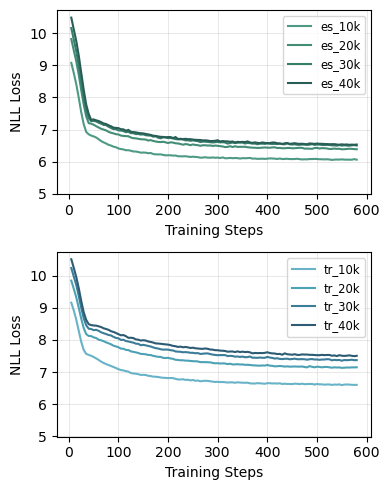

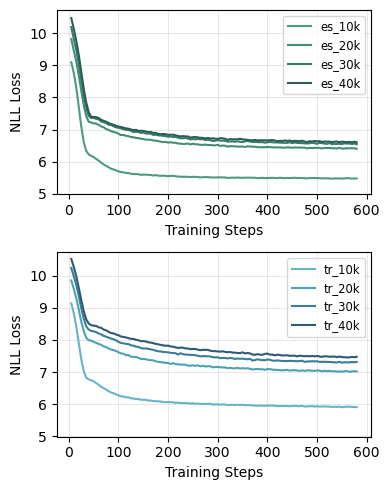

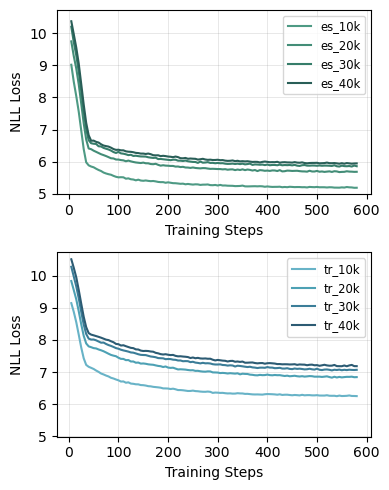

In [93]:
plot_and_save_losses(bpe_nll, "bpe_nll.svg", colors, y_limits_nll, 'NLL Loss')
plot_and_save_losses(wordpiece_nll, "wordpiece_nll.svg", colors, y_limits_nll, 'NLL Loss')
plot_and_save_losses(unigram_nll, "unigram_nll.svg", colors, y_limits_nll, 'NLL Loss')